In [2]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
results_folder = r'C:\Users\Mahender\Documents\MS docs\Final docs\Rowan University\Research_project\GCN neighborhood\saved_pc_results'

In [4]:
def load_all_pkl_files(folder_path):
    # Dictionary to store the loaded data
    all_models_results = {}

    # List all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a .pkl file
        if filename.endswith('.pkl'):
            # Full path to the file
            file_path = os.path.join(folder_path, filename)
            
            # Load the .pkl file
            with open(file_path, 'rb') as file:
                model_results = pickle.load(file)
            
            # Use the filename (without extension) as the key in the dictionary
            model_name = os.path.splitext(filename)[0]
            all_models_results[model_name] = model_results
    
    return all_models_results

In [5]:
all_models_results = load_all_pkl_files(results_folder)

In [6]:
all_models_results.keys()

dict_keys(['base_add_1', 'base_add_1_10sec', 'base_add_1_10sec_12step', 'base_add_1_10sec_24step', 'base_add_1_10sec_6step', 'base_add_1_5sec', 'base_add_1_5sec_12step', 'base_add_1_5sec_24step', 'base_add_1_5sec_6step', 'base_add_1_5sec_aggr', 'base_add_2', 'base_add_2_10sec', 'base_add_2_10sec_12step', 'base_add_2_10sec_24step', 'base_add_2_10sec_6step', 'base_add_2_30sec', 'base_add_2_5sec', 'base_add_2_5sec_12step', 'base_add_2_5sec_24step', 'base_add_2_5sec_6step', 'base_add_2_5sec_aggr', 'base_add_2_exp', 'base_add_exp_1', 'base_mean_1', 'base_mean_2', 'base_same_0.5opp_2', 'MLv1_add_1', 'MLv1_mean_1', 'MLv2_add_1', 'MLv2_mean_1', 'MLv3_mul_1'])

In [7]:
all_models_results['base_add_1'].keys()

dict_keys(['model', 'aggregation', 'game', 'true_influences_all_samples', 'predicted_influences_all_samples', 'residue_all_samples', 'mean_residue_per_player', 'average_residue_all_players', 'median_residue_per_player'])

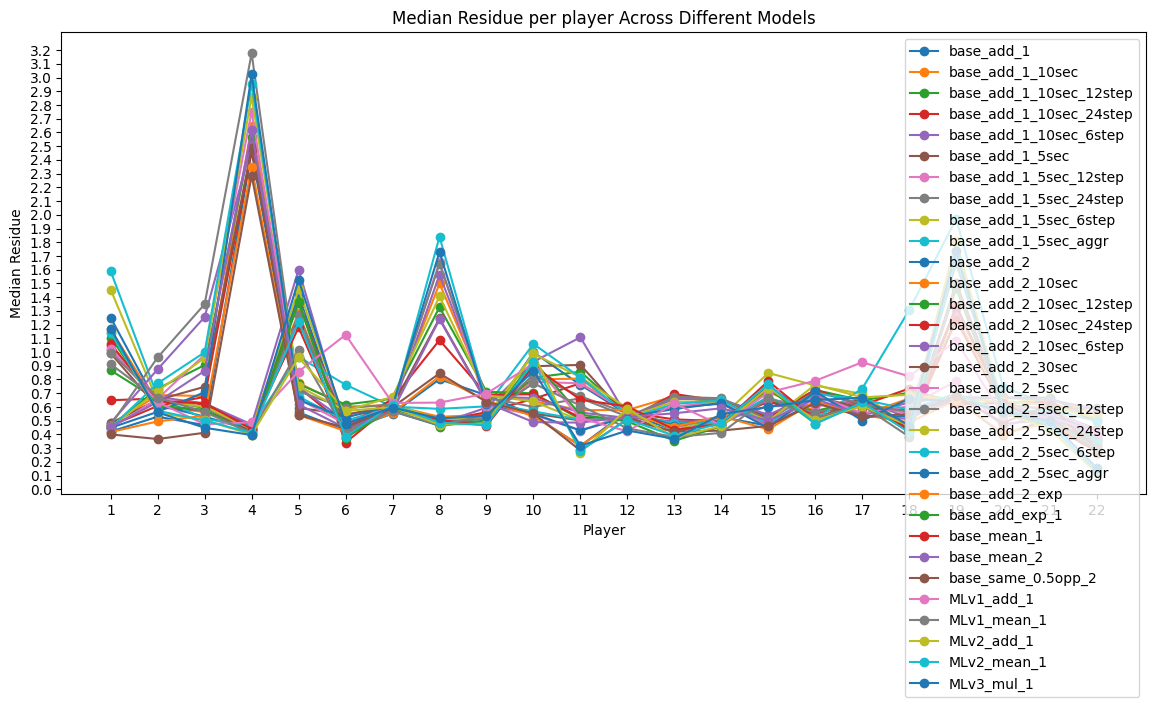

In [8]:
plt.figure(figsize=(14, 6))
players = np.arange(1, 23)

max_val = 0
for model_name in all_models_results.keys():
    median_residue_per_player = all_models_results[model_name]['median_residue_per_player']
    plt.plot(players, median_residue_per_player, 'o-',  label=model_name)
    if np.max(median_residue_per_player) > max_val:
        max_val = np.max(median_residue_per_player)

plt.xlabel('Player')
plt.ylabel('Median Residue')
plt.xticks(players)
plt.yticks(np.arange(0, max_val + 0.1, 0.1))  # Set y-ticks at 0.1 intervals
plt.title('Median Residue per player Across Different Models')
plt.legend()
plt.show()

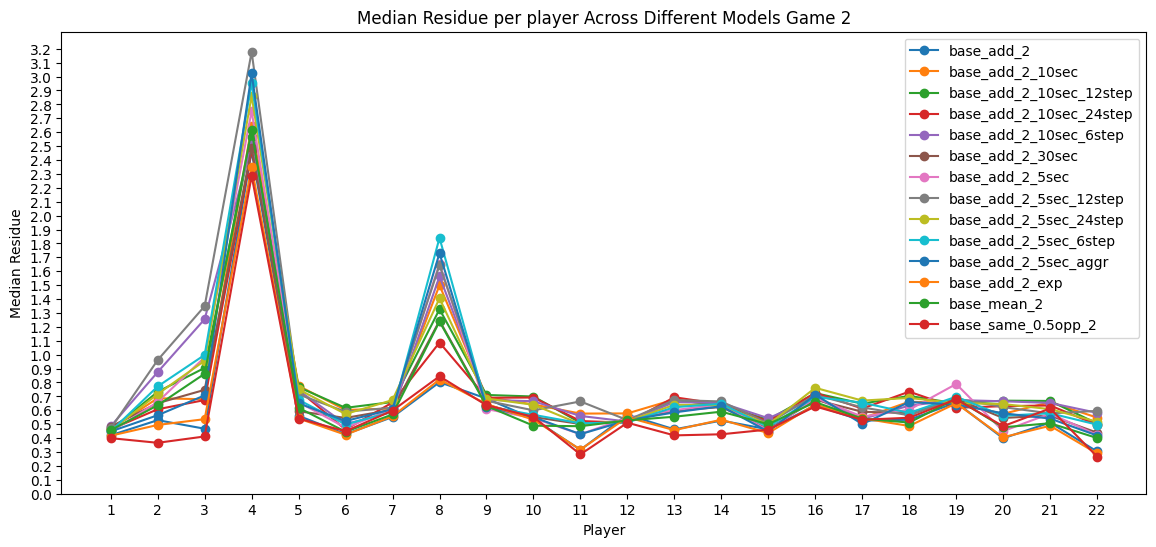

In [9]:
plt.figure(figsize=(14, 6))
players = np.arange(1, 23)

max_val = 0
for model_name in all_models_results.keys():
    median_residue_per_player = all_models_results[model_name]['median_residue_per_player']
    if all_models_results[model_name]['game'] == 2:
        plt.plot(players, median_residue_per_player, 'o-',  label=model_name)
        if np.max(median_residue_per_player) > max_val:
            max_val = np.max(median_residue_per_player)

plt.xlabel('Player')
plt.ylabel('Median Residue')
plt.xticks(players)
plt.yticks(np.arange(0, max_val + 0.1, 0.1))  # Set y-ticks at 0.1 intervals
plt.title('Median Residue per player Across Different Models Game 2')
plt.legend()
plt.show()

In [10]:
for model_name in all_models_results.keys():
    if  all_models_results[model_name]['game'] == 1:
        print(model_name)

base_add_1
base_add_1_10sec
base_add_1_10sec_12step
base_add_1_10sec_24step
base_add_1_10sec_6step
base_add_1_5sec
base_add_1_5sec_12step
base_add_1_5sec_24step
base_add_1_5sec_6step
base_add_1_5sec_aggr
base_add_exp_1
base_mean_1
MLv1_add_1
MLv1_mean_1
MLv2_add_1
MLv2_mean_1
MLv3_mul_1


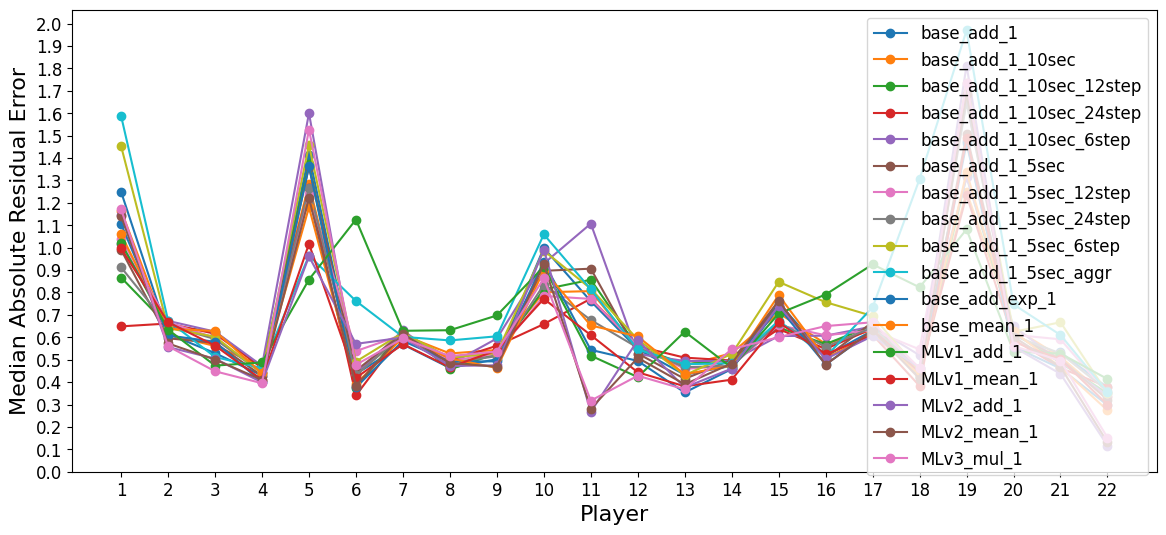

In [51]:
plt.figure(figsize=(14, 6))
players = np.arange(1, 23)

max_val = 0
for model_name in all_models_results.keys():
    median_residue_per_player = all_models_results[model_name]['median_residue_per_player']
    if  all_models_results[model_name]['game'] == 1:
        plt.plot(players, median_residue_per_player, 'o-',  label=model_name)
        if np.max(median_residue_per_player) > max_val:
            max_val = np.max(median_residue_per_player)

plt.xlabel('Player', fontsize=16)
plt.ylabel('Median Absolute Residual Error', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(players)
plt.yticks(np.arange(0, max_val + 0.1, 0.1))  # Set y-ticks at 0.1 intervals
# plt.title('Median Residue per player Across Different Models Game 1')
plt.legend(fontsize=12)
plt.show()

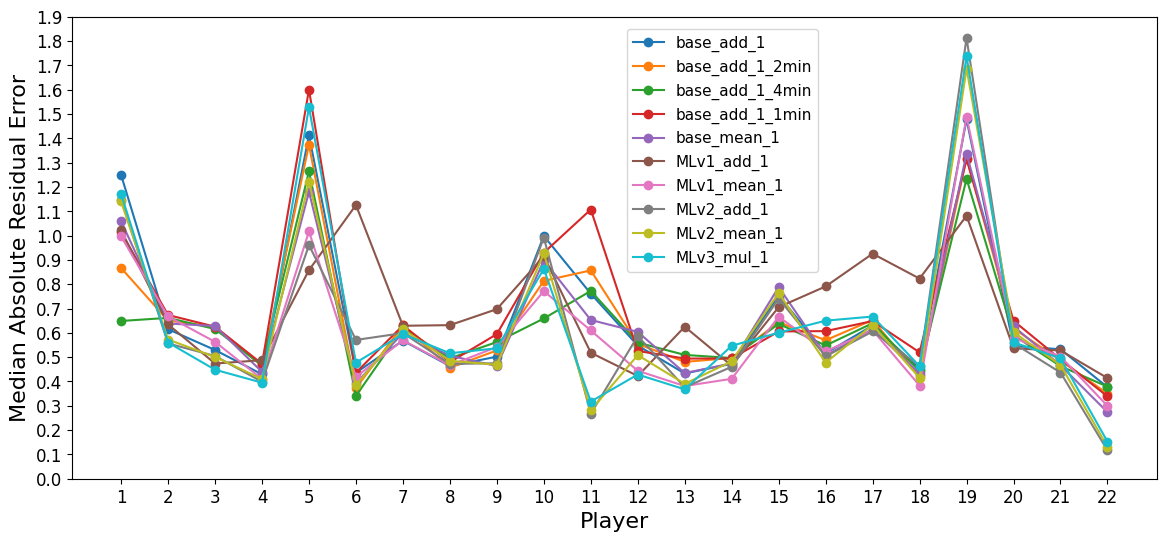

In [26]:
plt.figure(figsize=(14, 6))
players = np.arange(1, 23)

exclusion_list = ['base_add_1_5sec', 'base_add_1_5sec_aggr', 'base_add_1_5sec_6step', 'base_add_1_5sec_12step', 'base_add_1_5sec_24step', 'base_add_1_10sec', 'base_add_exp_1']

max_val = 0
for model_name in all_models_results.keys():
    median_residue_per_player = all_models_results[model_name]['median_residue_per_player']
    if  all_models_results[model_name]['game'] == 1 and model_name not in exclusion_list:
        if model_name == 'base_add_1_10sec_6step':
            model_name = 'base_add_1_1min'
        elif model_name == 'base_add_1_10sec_12step':
            model_name = 'base_add_1_2min'
        elif model_name == 'base_add_1_10sec_24step':
            model_name = 'base_add_1_4min'
        plt.plot(players, median_residue_per_player, 'o-',  label=model_name)
        if np.max(median_residue_per_player) > max_val:
            max_val = np.max(median_residue_per_player)

plt.xlabel('Player', fontsize=16)
plt.ylabel('Median Absolute Residual Error', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(players)
plt.yticks(np.arange(0, max_val + 0.1, 0.1))  # Set y-ticks at 0.1 intervals
# plt.title('Median Residue per player Across Different Models Game 1')
plt.legend(fontsize=11, bbox_to_anchor=(0.6, 0.43))
plt.show()

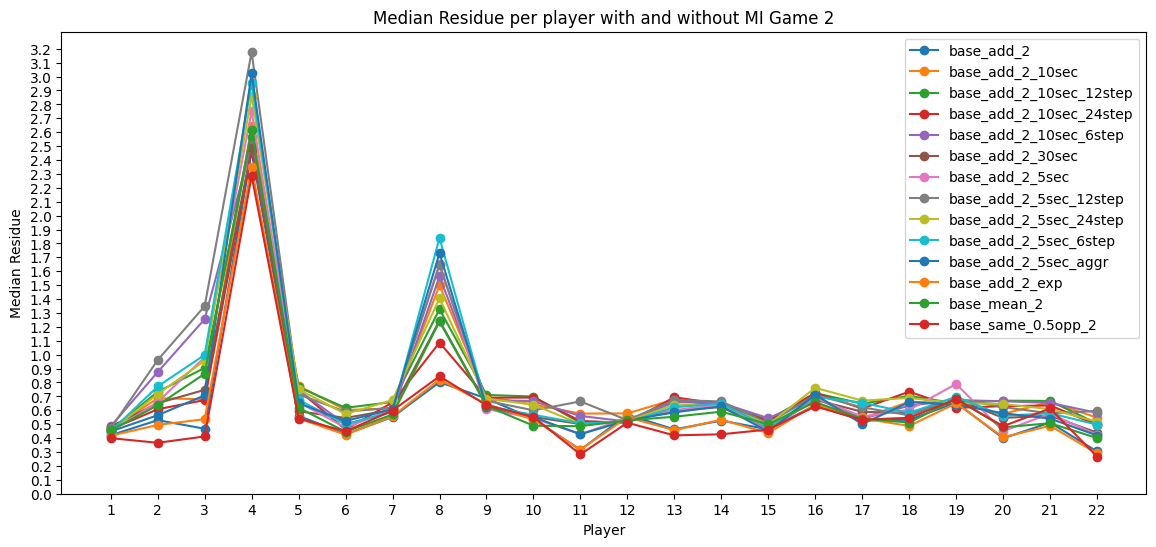

In [52]:
plt.figure(figsize=(14, 6))
players = np.arange(1, 23)

max_val = 0
for model_name in all_models_results.keys():
#     if all_models_results[model_name]['aggregation'] == 'add' and all_models_results[model_name]['model'] in ['base','MLv1']:
    if all_models_results[model_name]['model'] in ['base','MLv1'] and all_models_results[model_name]['game'] == 2:
        median_residue_per_player = all_models_results[model_name]['median_residue_per_player']
        plt.plot(players, median_residue_per_player, 'o-',  label=model_name)
        if np.max(median_residue_per_player) > max_val:
            max_val = np.max(median_residue_per_player)

plt.xlabel('Player')
plt.ylabel('Median Residue')
plt.xticks(players)
plt.yticks(np.arange(0, max_val + 0.1, 0.1))  # Set y-ticks at 0.1 intervals
plt.title('Median Residue per player with and without MI Game 2')
plt.legend()
plt.show()

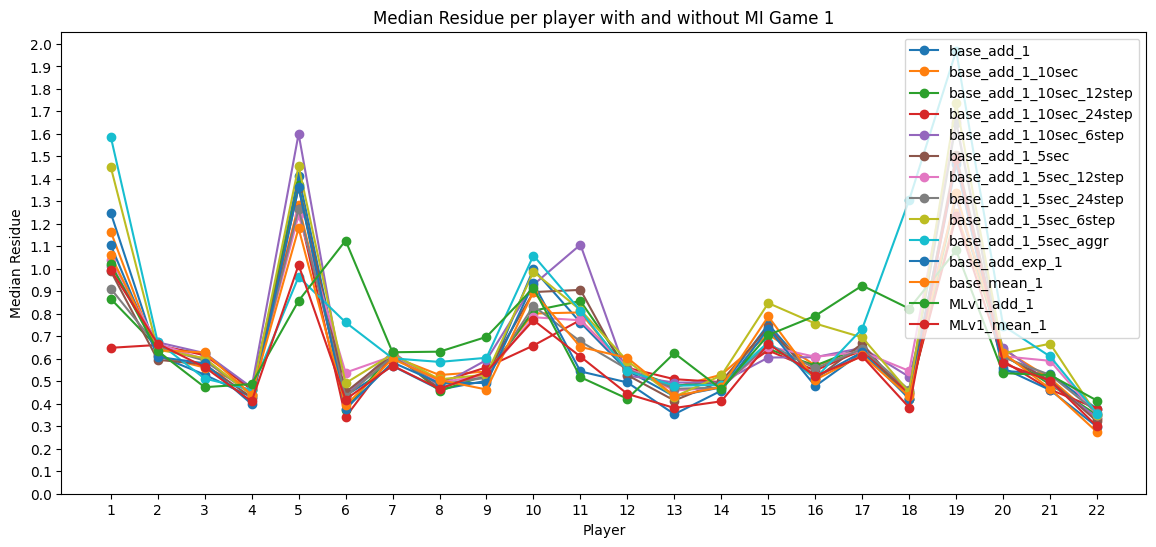

In [53]:
plt.figure(figsize=(14, 6))
players = np.arange(1, 23)

max_val = 0
for model_name in all_models_results.keys():
#     if all_models_results[model_name]['aggregation'] == 'add' and all_models_results[model_name]['model'] in ['base','MLv1']:
    if all_models_results[model_name]['model'] in ['base','MLv1'] and all_models_results[model_name]['game'] == 1:
        median_residue_per_player = all_models_results[model_name]['median_residue_per_player']
        plt.plot(players, median_residue_per_player, 'o-',  label=model_name)
        if np.max(median_residue_per_player) > max_val:
            max_val = np.max(median_residue_per_player)

plt.xlabel('Player')
plt.ylabel('Median Residue')
plt.xticks(players)
plt.yticks(np.arange(0, max_val + 0.1, 0.1))  # Set y-ticks at 0.1 intervals
plt.title('Median Residue per player with and without MI Game 1')
plt.legend()
plt.show()